In [9]:
# create dataset for contrastive learning
# 1. create a list of all images
# 2. construct training batches





In [10]:
import transformers
from transformers import Swinv2Model, AutoImageProcessor
import torch
from PIL import Image
from torch.nn.functional import cosine_similarity

# Load model and tokenizer

model = Swinv2Model.from_pretrained("../pretrained_model")
processor = AutoImageProcessor.from_pretrained("../pretrained_model")

# following Gao et al. 21
dropout = torch.nn.Dropout(0.6)
def get_positives(image: Image.Image, n: int):
    processed = processor(image, return_tensors="pt")
    postives = [dropout(processed.pixel_values) for _ in range(n)]
    return postives

def embedd(image: torch.Tensor):
    # processed = processor(image, return_tensors="pt")
    return model(image).pooler_output.squeeze()

test_image_2 = Image.open("../test_images/a.png").convert("RGB")
test_image = Image.open("../test_images/b.png").convert("RGB")
positives = get_positives(test_image, 3)
embeddings = [embedd(p) for p in positives]
test_2_embedding = embedd(processor(test_image_2, return_tensors="pt").pixel_values)



In [11]:
cosine_similarity(embeddings[0], embeddings[2], dim=0)

tensor(0.9957, grad_fn=<SumBackward1>)

In [12]:
cosine_similarity(embeddings[0], test_2_embedding, dim=0)

tensor(0.7814, grad_fn=<SumBackward1>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


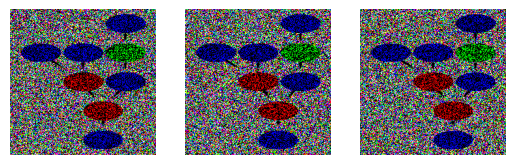

In [14]:
# visualize positives
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3)
for i, positive in enumerate(positives):
    axs[i].imshow(positive.squeeze().permute(1, 2, 0))
    axs[i].axis("off")
